In [1]:
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns


repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [2]:

def get_predicted_ratings(games, pi_values):
    models = [
        'newman', 'newman_leadership', 'higher_order_newman', 
        'higher_order_leadership', 'spring_rank', 'spring_rank_leadership', 
        'page_rank', 'page_rank_leadership', 'point_wise'
    ]
    
    predicted_rankings = {}
    for model in models:
        predictions = get_predictions(model, games, pi_values)
        predicted_rankings[model] = list(predictions.values())

    return predicted_rankings

def get_distributions_luces_axiom(N, M, K1, K2, leadership=False):

    if leadership:
        data, pi_values = generate_leadership_model_instance(N, M, K1, K2)
    else:
        data, pi_values = generate_model_instance(N, M, K1, K2)

    flipped_games = [game[::-1] for game in data]

    data.extend(flipped_games)

    return get_predicted_ratings(data, pi_values)

def get_distributions(N, M, K1, K2, leadership=False):
    if leadership:
        data, pi_values = generate_leadership_model_instance(N, M, K1, K2)
    else:
        data, pi_values = generate_model_instance(N, M, K1, K2)

    return get_predicted_ratings(data, pi_values)

def plot_distributions(predictions):
    num_models = len(predictions)
    colors = sns.color_palette("husl", num_models) 

    # Create subplots
    fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=False)

    # Plot each distribution independently
    for i, (model, preds) in enumerate(predictions.items()):
        row = i // 3
        col = i % 3
        sns.kdeplot(preds, ax=axs[row, col], fill=True, color=colors[i])
        axs[row, col].set_title(f'Distribution of Predicted Ratings for {model}')
        axs[row, col].set_xlabel('Predicted Rantings')
        axs[row, col].set_ylabel('Density')

    plt.tight_layout()
    plt.show()






# Standard

In [4]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions(N,M,K1,K2)
print(predictions)
plot_distributions(predictions)

NameError: name 'get_distributions' is not defined

#### Luce's Axiom

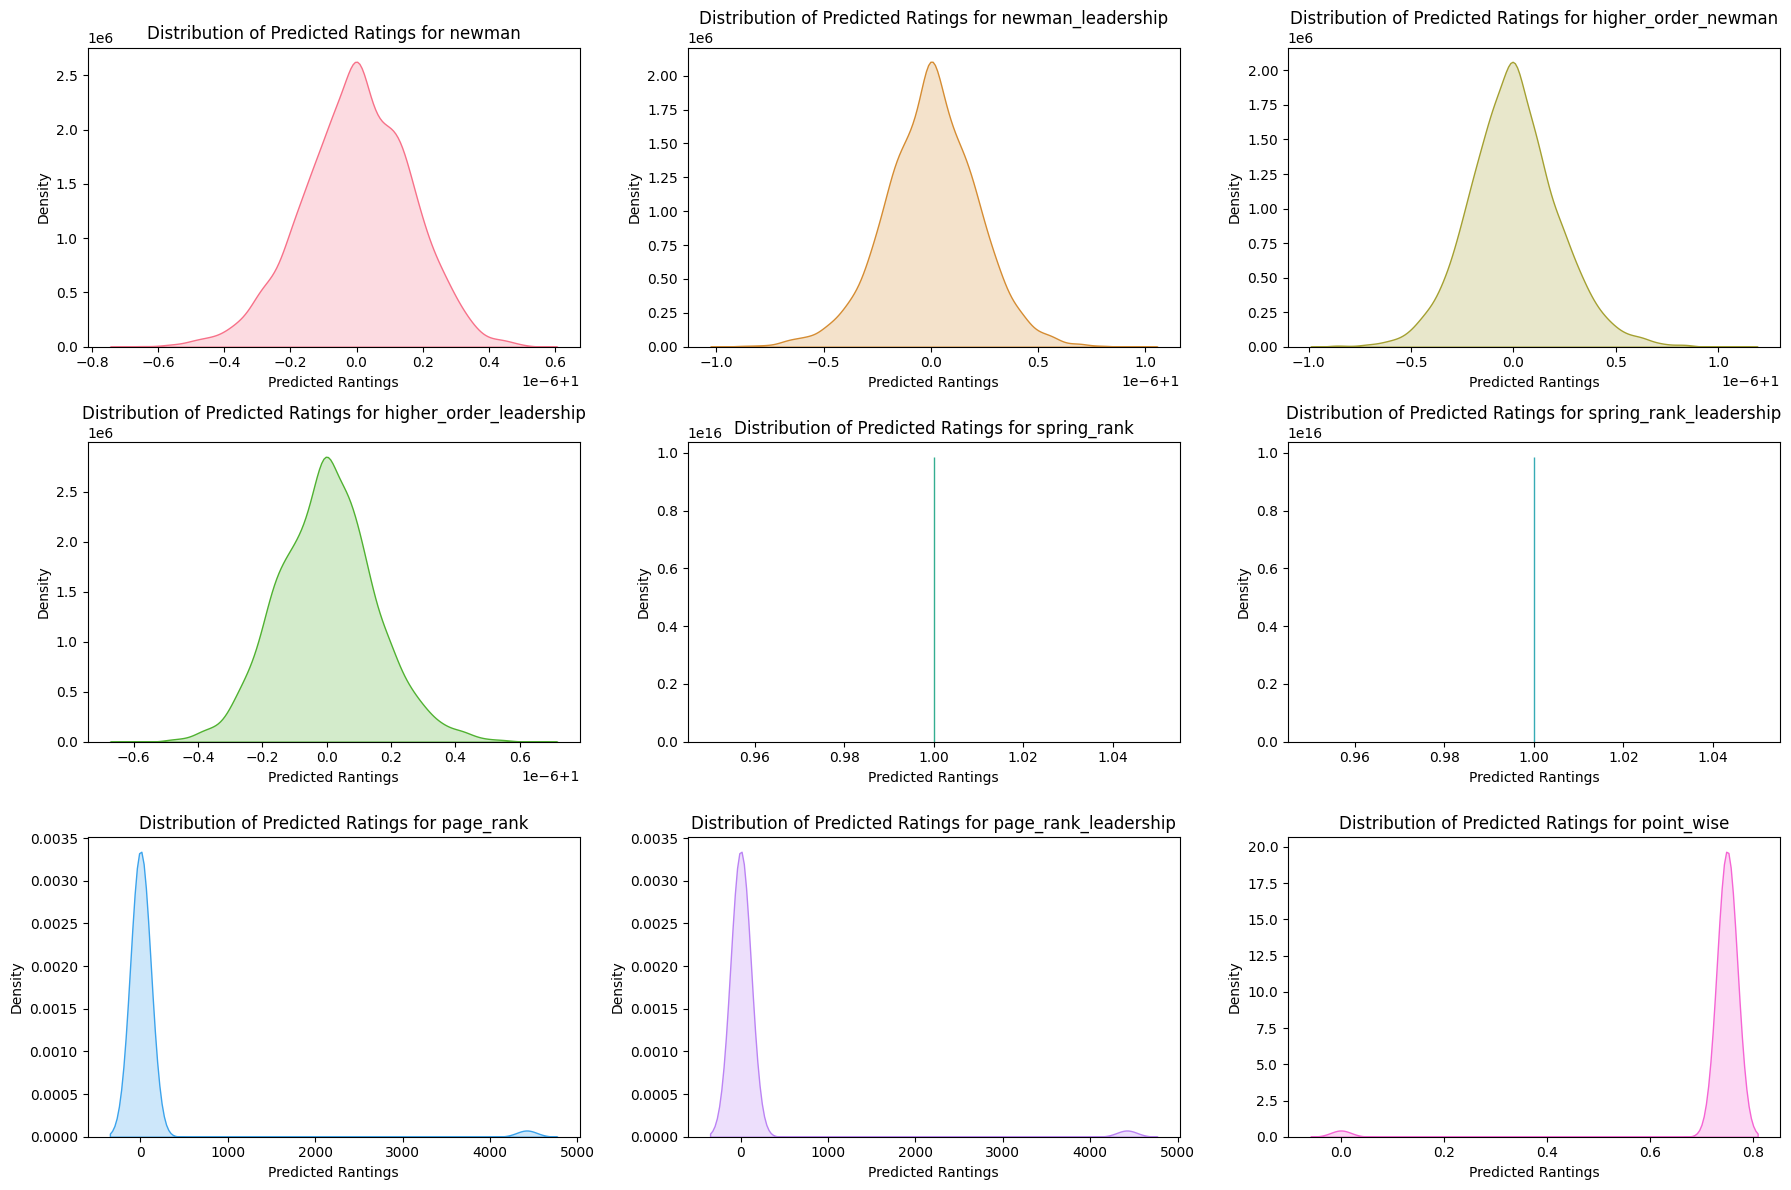

In [4]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions_luces_axiom(N,M,K1,K2)
plot_distributions(predictions)


# Higher Order

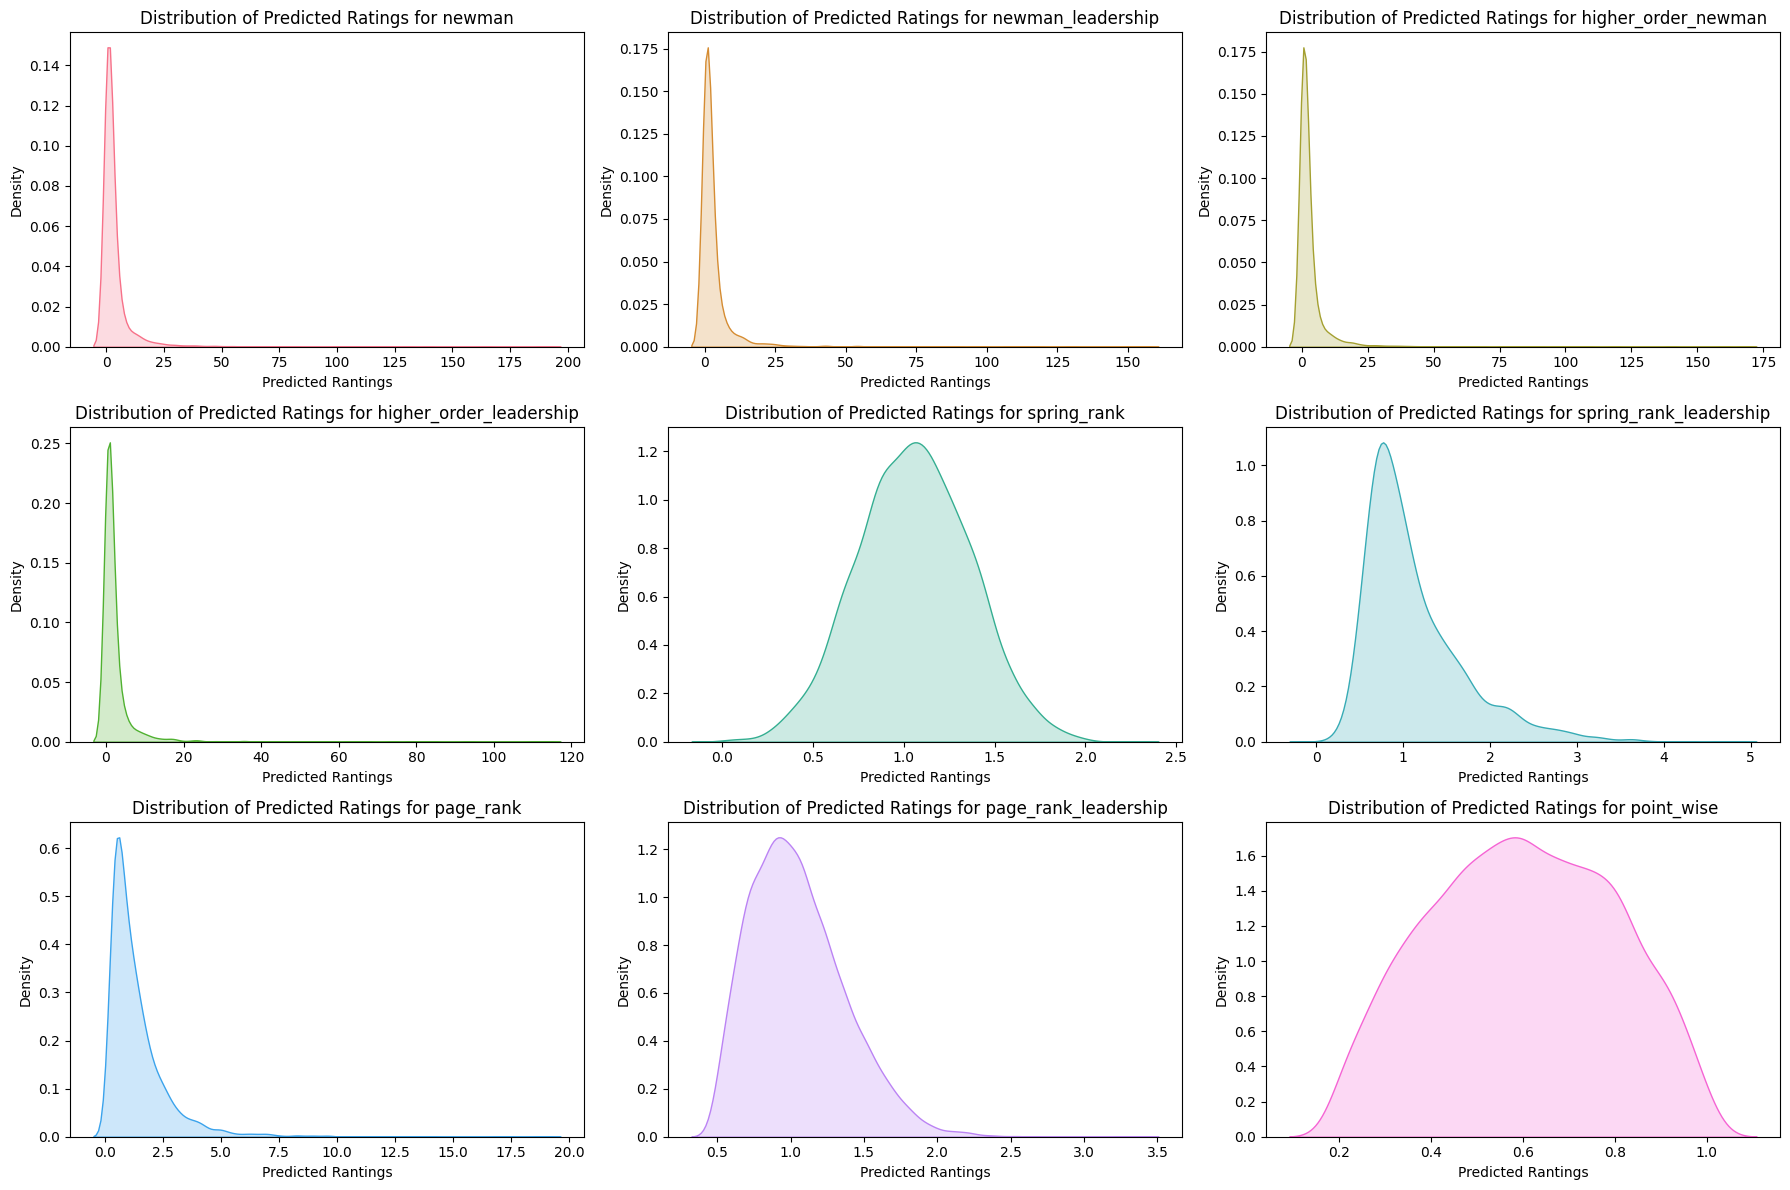

In [5]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2)
plot_distributions(predictions)

#### Luce's Axiom

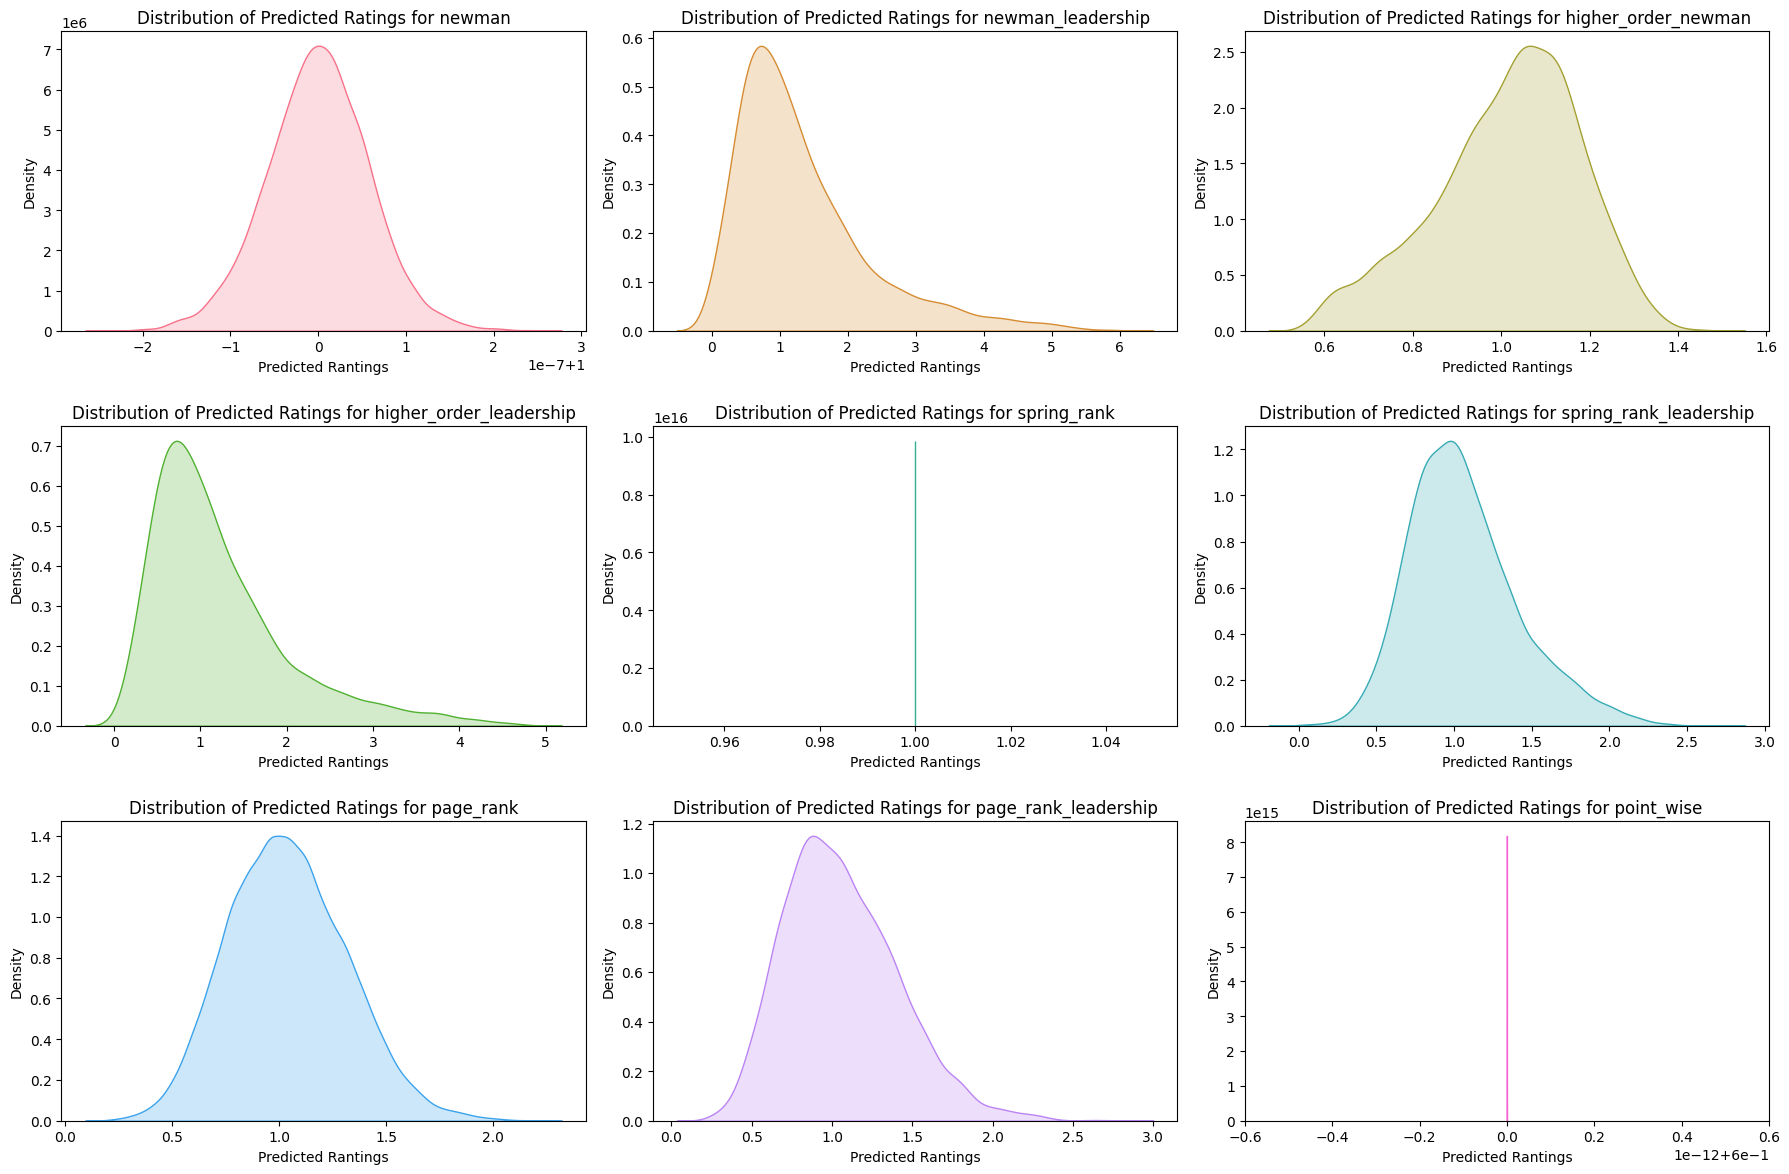

In [6]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luces_axiom(N,M,K1,K2)
plot_distributions(predictions)

# Higher Order Leadership

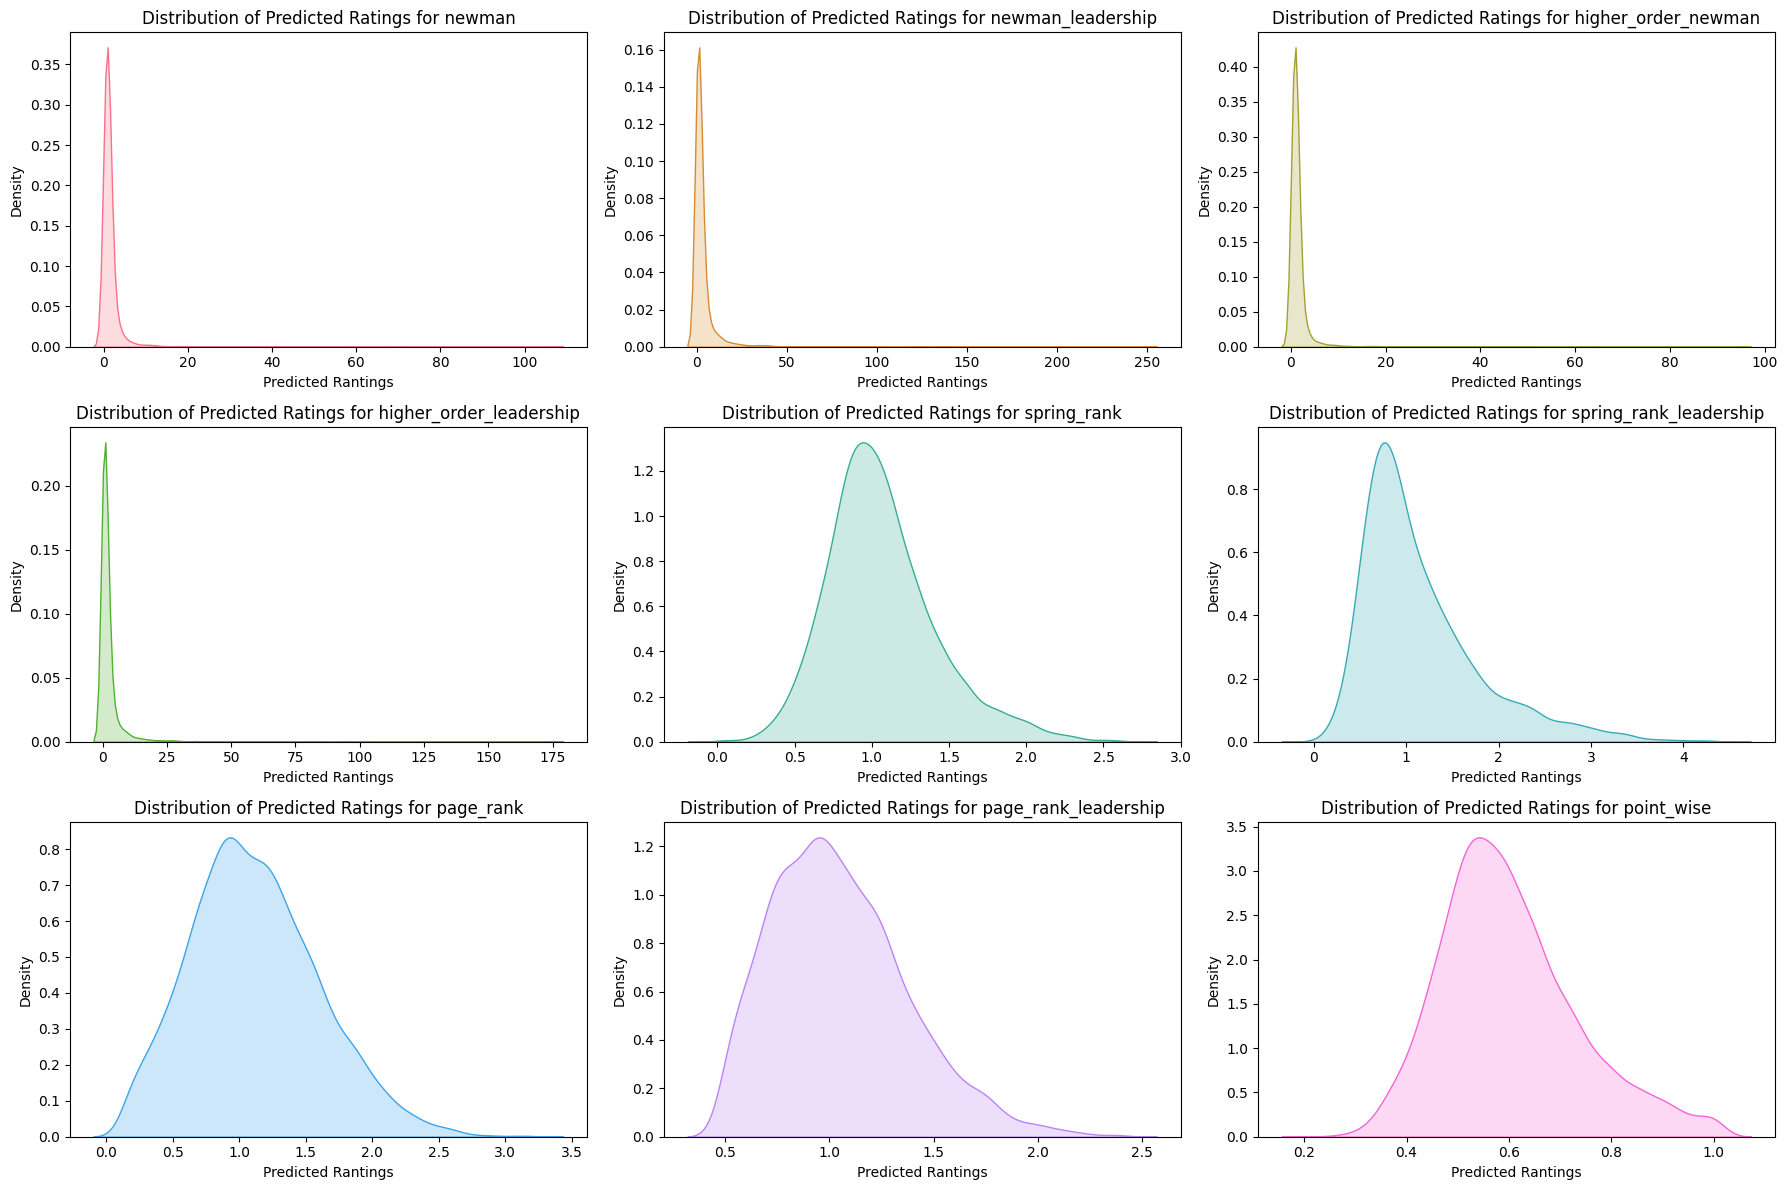

In [7]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2, leadership=True)
plot_distributions(predictions)

#### Luce's Axiom

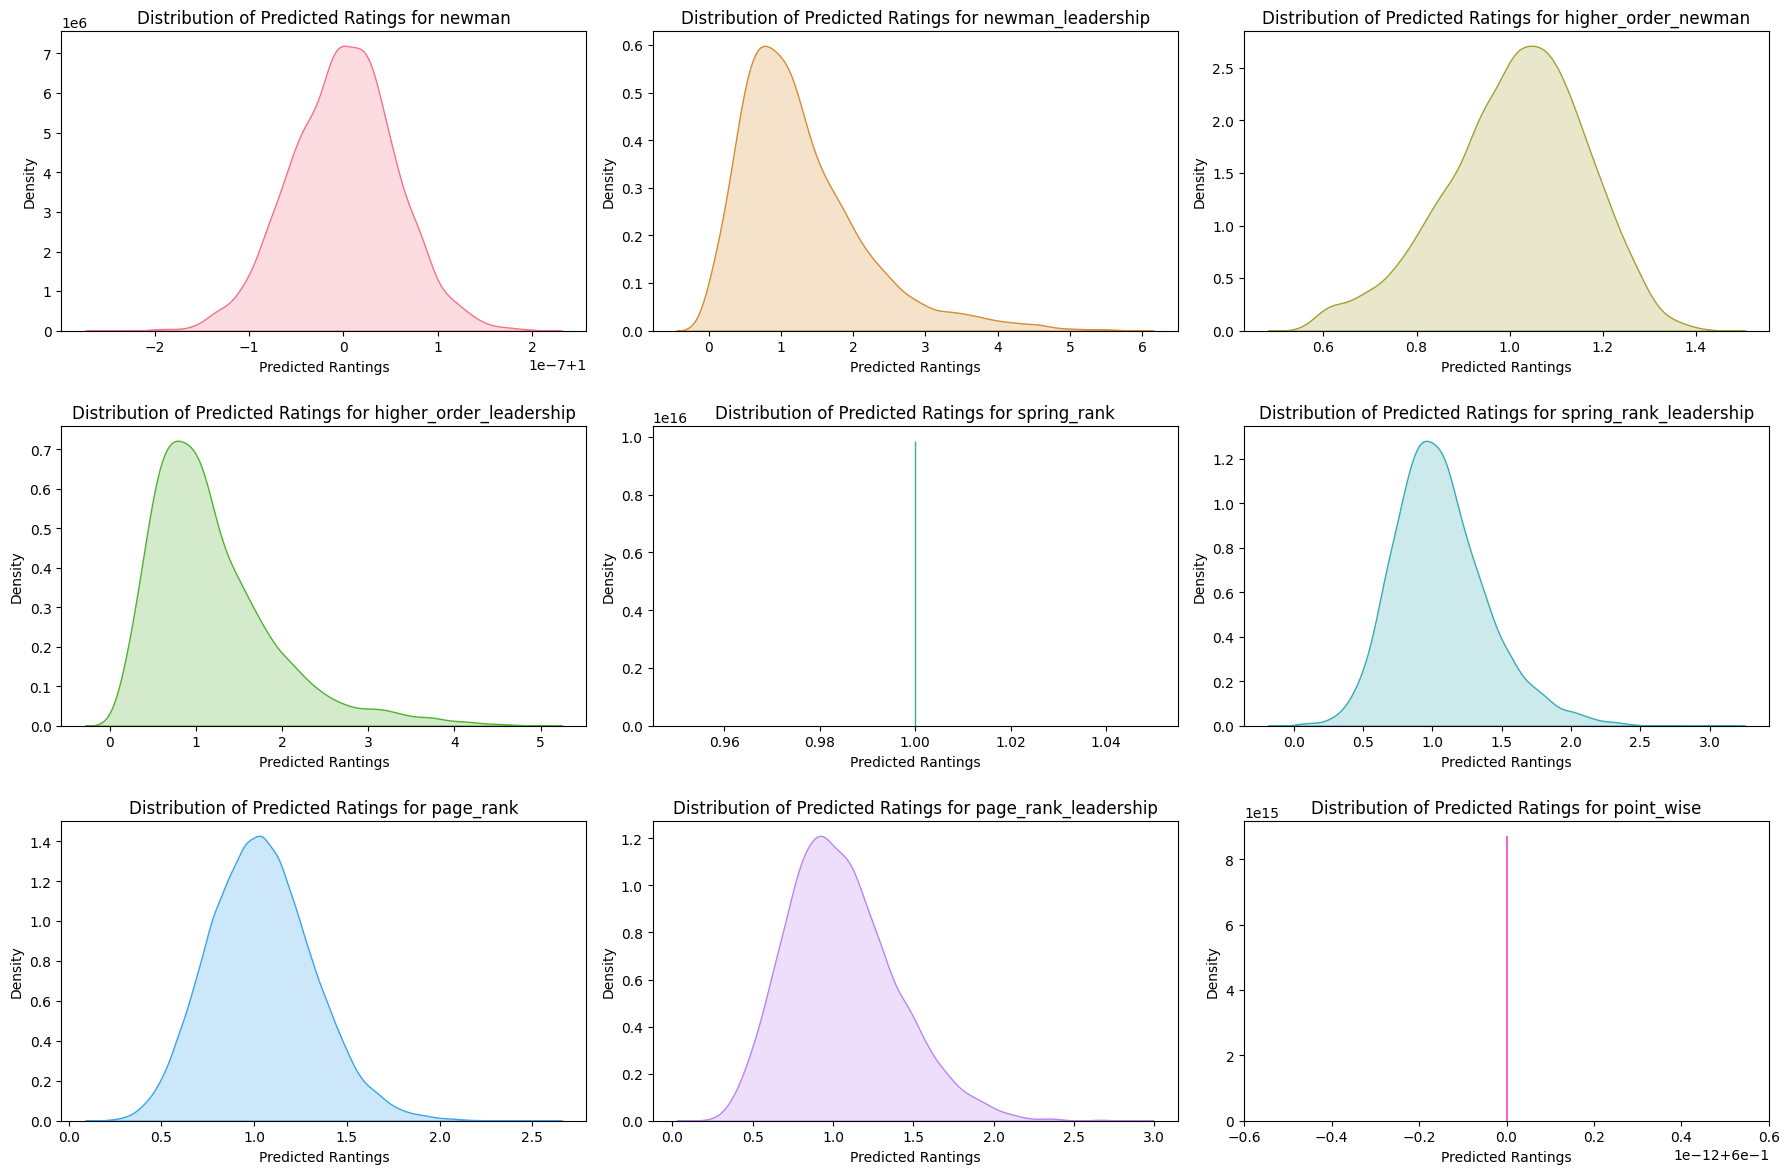

In [8]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luces_axiom(N,M,K1,K2, leadership=True)
plot_distributions(predictions)